In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import prep
from math import sqrt
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('monthly_sales.csv')

In [3]:
df.head()

,year,commercial,private,total_sales
0,1967-01-01,2031.3,6362.1,8393.0
1,1967-02-01,1834.4,5632.8,7467.0
2,1967-03-01,1954.5,5932.2,7887.0
3,1967-04-01,2164.6,6671.7,8836.0
4,1967-05-01,2099.3,6569.4,8669.0


In [4]:
df.dtypes

year            object
commercial     float64
private        float64
total_sales    float64
dtype: object

In [5]:
df.year = pd.to_datetime(df.year)

In [6]:
df = df.set_index("year")

In [7]:
train, validate, test = prep.time_series_split(df)

In [8]:
train.shape, validate.shape, test.shape

((540, 3), (60, 3), (67, 3))

In [9]:
train.columns

Index(['commercial', 'private', 'total_sales'], dtype='object')

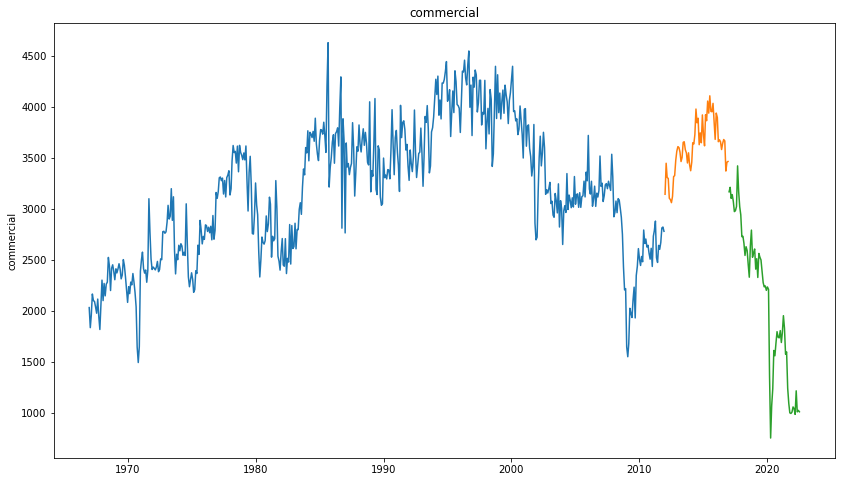

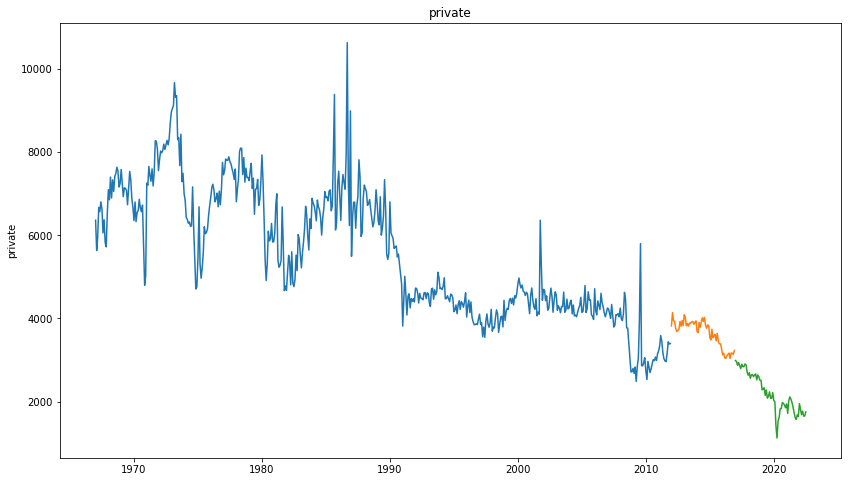

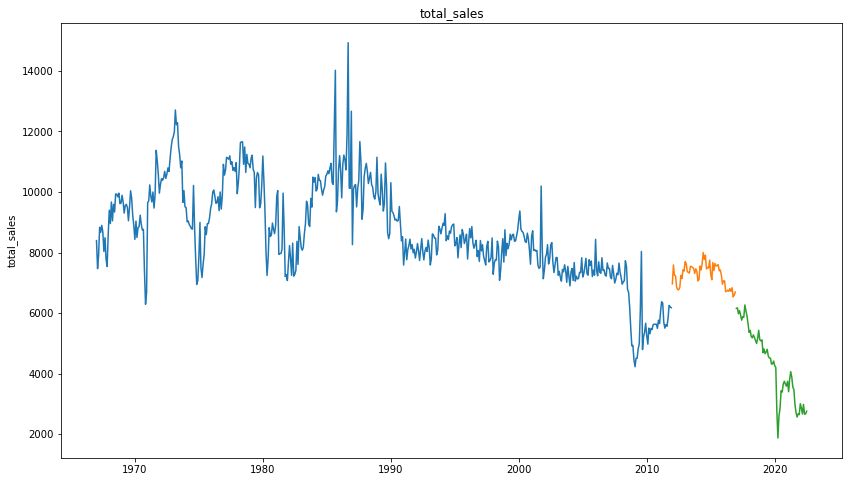

In [10]:
for col in train.columns:
    plt.figure(figsize=(14,8))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

In [11]:
train = train.drop(columns=['commercial', 'private'])

In [12]:
from math import sqrt
from sklearn.metrics import mean_squared_error
# evaluation function to compute rmse
def evaluate(target_var):
    
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

In [13]:
def plot_and_eval(target_var):
    '''
    This function takes in the target var name (string), and returns a plot
    of the values of train for that variable, validate, and the predicted values from yhat_df. 
    it will als lable the rmse. 
    '''
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label='Train', linewidth=1)
    plt.plot(validate[target_var], label='Validate', linewidth=1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

In [14]:
# Create the empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])

# function to store the rmse so that we can compare
def append_eval_df(model_type, target_var):
    '''
    this function takes in as arguments the type of model run, and the name of the target variable. 
    It returns the eval_df with the rmse appended to it for that model and target_var. 
    '''
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var],
        'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

#  Starting Predictions and Baselines
---

Forming a baseline by using a simple average: Our simple average baseline is 6175.0

In [15]:
train['total_sales'][-1:][0]

6175.0

The Last obeserved value is 6175. We can use this to predict all future new car sales will be equal to 6175

In [16]:
# Assigning last observade value to a variable.
last_sale = train['total_sales'][-1:][0]
last_sale

6175.0

Adding last sale to a yhat dataframe to visualize later

In [17]:
yhat_df = pd.DataFrame(
    {'total_sales': [last_sale]},
    index=validate.index)

yhat_df.head()

,total_sales
year,
2012-01-01,6175.0
2012-02-01,6175.0
2012-03-01,6175.0
2012-04-01,6175.0
2012-05-01,6175.0


These are all the same as to be expected

total_sales -- RMSE: 1146


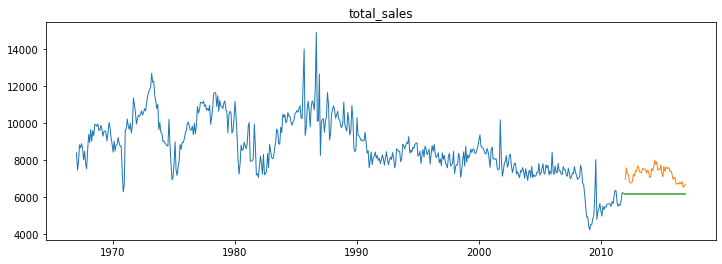

In [18]:
plot_and_eval('total_sales')

# Evaluate

Evaluate using MSE and RMSE, and add evaluation metrics to eval_df

In [19]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'last_observed_value', 
                             target_var = col)

eval_df

/var/folders/ph/3fq5z80j5qjd537qn7g5pphc0000gn/T/ipykernel_68971/1949469631.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


,model_type,target_var,rmse
0,last_observed_value,total_sales,1146.0


# Making a simple average forecast

In [20]:
# compute simple average
avg_sales = round(train['total_sales'].mean(), 2)
avg_sales

8704.48

That average new vehicle sales is 8704.48

In [24]:
def make_predictions(sales=None, quantity=None):
    yhat_df = pd.DataFrame({'total_sales': [avg_sales]},
                          index=validate.index)
    return yhat_df

In [25]:
yhat_df = make_predictions(avg_sales)
yhat_df

,total_sales
year,
2012-01-01,8704.48
2012-02-01,8704.48
2012-03-01,8704.48
2012-04-01,8704.48
2012-05-01,8704.48
2012-06-01,8704.48
2012-07-01,8704.48
2012-08-01,8704.48
2012-09-01,8704.48


Once again this is all the same as to be expected

total_sales -- RMSE: 1485


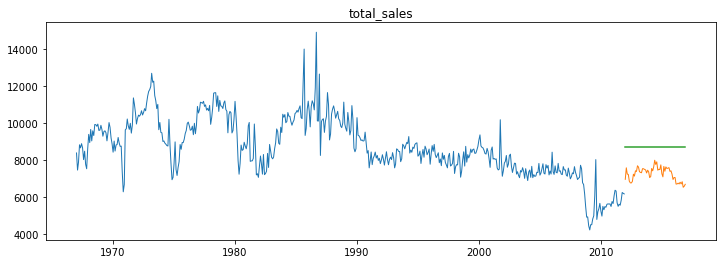

In [26]:
plot_and_eval('total_sales')

# Moving Average

In [27]:
# demonstrate that the mean of the first six months 
# is equal to rolling(6) on month 6

print(train['total_sales'].rolling(6).mean())

year
1967-01-01            NaN
1967-02-01            NaN
1967-03-01            NaN
1967-04-01            NaN
1967-05-01            NaN
                 ...     
2011-08-01    5848.500000
2011-09-01    5758.666667
2011-10-01    5745.500000
2011-11-01    5830.000000
2011-12-01    5942.000000
Name: total_sales, Length: 540, dtype: float64


In [28]:
period=6
train['total_sales'].rolling(period).mean()[-1]

5942.0

In [29]:
period = 6 

# take 30 day rolling average, then take the last element and that will the one that propogates 
# forward as our prediction. 
rolling_sales = round(train['total_sales'].rolling(period).mean()[-1], 2)

In [30]:
yhat_df = make_predictions(rolling_sales)
yhat_df.head()

,total_sales
year,
2012-01-01,8704.48
2012-02-01,8704.48
2012-03-01,8704.48
2012-04-01,8704.48
2012-05-01,8704.48


In [34]:
periods = [3, 6, 9, 12, 15]

for p in periods: 
    rolling_sales = round(train['total_sales'].rolling(p).mean()[-1], 2)
   
    yhat_df = make_predictions(rolling_sales)
    model_type = str(p) + '_month_moving_avg'
    for col in train.columns:
        eval_df = append_eval_df(model_type = model_type,
                                target_var = col)


eval_df

/var/folders/ph/3fq5z80j5qjd537qn7g5pphc0000gn/T/ipykernel_68971/1949469631.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)
/var/folders/ph/3fq5z80j5qjd537qn7g5pphc0000gn/T/ipykernel_68971/1949469631.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)
/var/folders/ph/3fq5z80j5qjd537qn7g5pphc0000gn/T/ipykernel_68971/1949469631.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)
/var/folders/ph/3fq5z80j5qjd537qn7g5pphc0000gn/T/ipykernel_68971/1949469631.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

,model_type,target_var,rmse
0,last_observed_value,total_sales,1146.0
1,3_month_moving_avg,total_sales,1485.0
2,6_month_moving_avg,total_sales,1485.0
3,9_month_moving_avg,total_sales,1485.0
4,12_month_moving_avg,total_sales,1485.0
5,15_month_moving_avg,total_sales,1485.0
6,3_month_moving_avg,total_sales,1485.0
7,6_month_moving_avg,total_sales,1485.0
8,9_month_moving_avg,total_sales,1485.0
9,12_month_moving_avg,total_sales,1485.0


In [36]:
min_items_rmse = eval_df[eval_df.target_var == 'total_sales']['rmse'].min()

min_items_rmse

1146.0

In [37]:
eval_df[eval_df.rmse == min_items_rmse]

,model_type,target_var,rmse
0,last_observed_value,total_sales,1146.0


# Using Holts Linear Trend

total_sales 



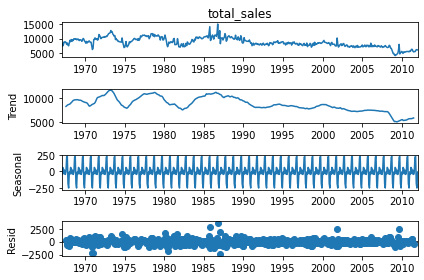

In [41]:
print(col, '\n')
sm.tsa.seasonal_decompose(train[col].resample('M').mean()).plot()
plt.show()

total_sales 



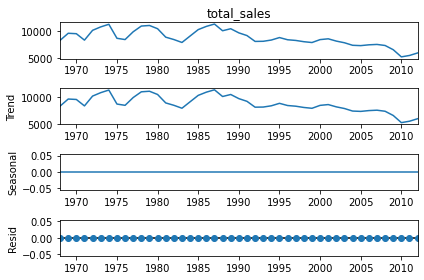

In [42]:
print(col, '\n')
sm.tsa.seasonal_decompose(train[col].resample('Y').mean()).plot()
plt.show()

Confirming the data is indeed seasonally adjusted.

In [44]:

# holt's linear trend model. 
from statsmodels.tsa.api import Holt

In [45]:
# create our Holt's Object
model = Holt(train['total_sales'], exponential=False, damped=True)

/var/folders/ph/3fq5z80j5qjd537qn7g5pphc0000gn/T/ipykernel_68971/259643743.py:2: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  model = Holt(train['total_sales'], exponential=False, damped=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [46]:
# fit the holt's object
model = model.fit(optimized=True)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [47]:
yhat_items = model.predict(start = validate.index[0],
                              end = validate.index[-1])

In [48]:

validate.shape

(60, 3)

In [49]:
yhat_items

2012-01-01    6209.164238
2012-02-01    6242.611804
2012-03-01    6275.724895
2012-04-01    6308.506855
2012-05-01    6340.960996
2012-06-01    6373.090595
2012-07-01    6404.898898
2012-08-01    6436.389118
2012-09-01    6467.564435
2012-10-01    6498.428000
2012-11-01    6528.982929
2012-12-01    6559.232309
2013-01-01    6589.179194
2013-02-01    6618.826611
2013-03-01    6648.177554
2013-04-01    6677.234988
2013-05-01    6706.001847
2013-06-01    6734.481037
2013-07-01    6762.675436
2013-08-01    6790.587891
2013-09-01    6818.221221
2013-10-01    6845.578217
2013-11-01    6872.661644
2013-12-01    6899.474237
2014-01-01    6926.018703
2014-02-01    6952.297725
2014-03-01    6978.313957
2014-04-01    7004.070026
2014-05-01    7029.568535
2014-06-01    7054.812059
2014-07-01    7079.803147
2014-08-01    7104.544324
2014-09-01    7129.038090
2014-10-01    7153.286918
2014-11-01    7177.293258
2014-12-01    7201.059534
2015-01-01    7224.588148
2015-02-01    7247.881476
2015-03-01  

In [51]:
yhat_df['total_sales'] = round(yhat_items, 2)

yhat_df

,total_sales
year,
2012-01-01,6209.16
2012-02-01,6242.61
2012-03-01,6275.72
2012-04-01,6308.51
2012-05-01,6340.96
2012-06-01,6373.09
2012-07-01,6404.90
2012-08-01,6436.39
2012-09-01,6467.56


total_sales -- RMSE: 673


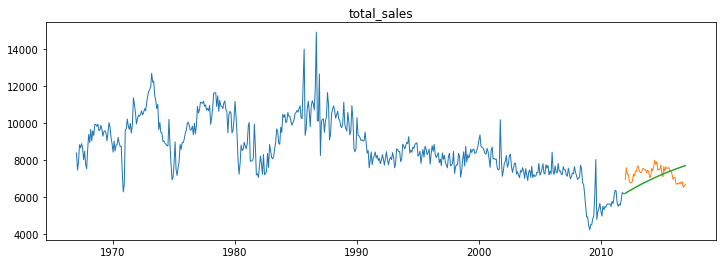

In [52]:
plot_and_eval(target_var = 'total_sales')

In [53]:
eval_df = append_eval_df(model_type = 'holts_optimized', 
                            target_var = 'total_sales')

/var/folders/ph/3fq5z80j5qjd537qn7g5pphc0000gn/T/ipykernel_68971/1949469631.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


In [54]:
eval_df.sort_values(by='rmse')

,model_type,target_var,rmse
11,holts_optimized,total_sales,673.0
0,last_observed_value,total_sales,1146.0
1,3_month_moving_avg,total_sales,1485.0
2,6_month_moving_avg,total_sales,1485.0
3,9_month_moving_avg,total_sales,1485.0
4,12_month_moving_avg,total_sales,1485.0
5,15_month_moving_avg,total_sales,1485.0
6,3_month_moving_avg,total_sales,1485.0
7,6_month_moving_avg,total_sales,1485.0
8,9_month_moving_avg,total_sales,1485.0


# Arima Modeling
- Using arima becuase the data has already been seasonally adjusted

In [55]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.total_sales.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.819318
p-value: 0.813381


Now I am checking the p value and it looks like its greater than 0.05 significance. I will look at the differencing and auto correlation 

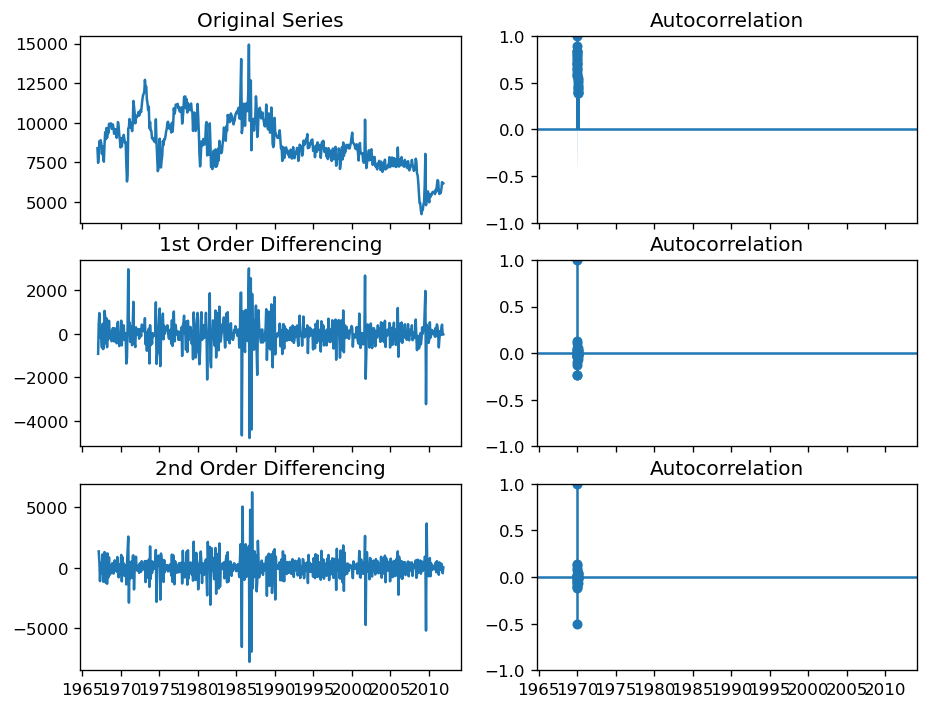

In [56]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})



# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(train.total_sales); axes[0, 0].set_title('Original Series')
plot_acf(train.total_sales, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(train.total_sales.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(train.total_sales.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(train.total_sales.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(train.total_sales.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

For the above series, the time series reaches stationarity within one or two orders of differencing. But on looking at the autocorrelation plot for the 2nd differencing the lag goes into the far negative zone fairly quick, which indicates, the series might have been over differenced.

In [60]:
from pmdarima.arima.utils import ndiffs

y = df.total_sales

## Adf Test
ndiffs(y, test='adf')  # 2

# KPSS test
ndiffs(y, test='kpss')  # 0

# PP test:
ndiffs(y, test='pp')  # 2

0

In [62]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,1 ARIMA Model
model = ARIMA(train.total_sales, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            total_sales   No. Observations:                  540
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4252.616
Date:                Mon, 19 Sep 2022   AIC                           8511.232
Time:                        15:17:52   BIC                           8524.101
Sample:                    01-01-1967   HQIC                          8516.266
                         - 12-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3103      0.061      5.111      0.000       0.191       0.429
ma.L1         -0.7258      0.052    -13.863      0.000      -0.828      -0.623
sigma2      4.149e+05    1.3e+04     31.814      0.0

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


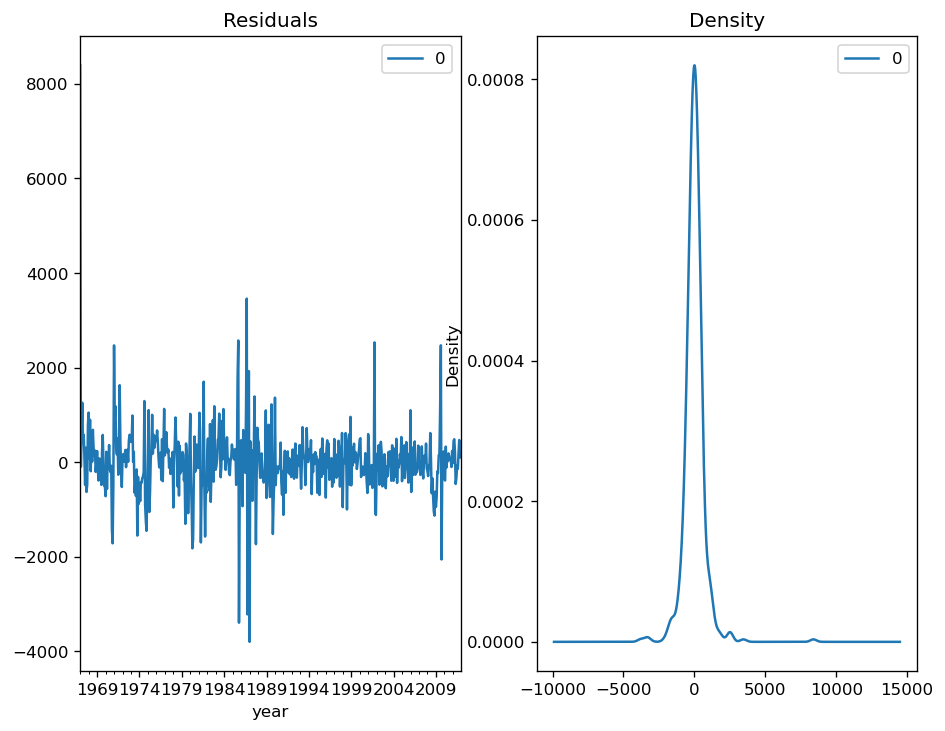

In [63]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

<AxesSubplot:xlabel='year'>

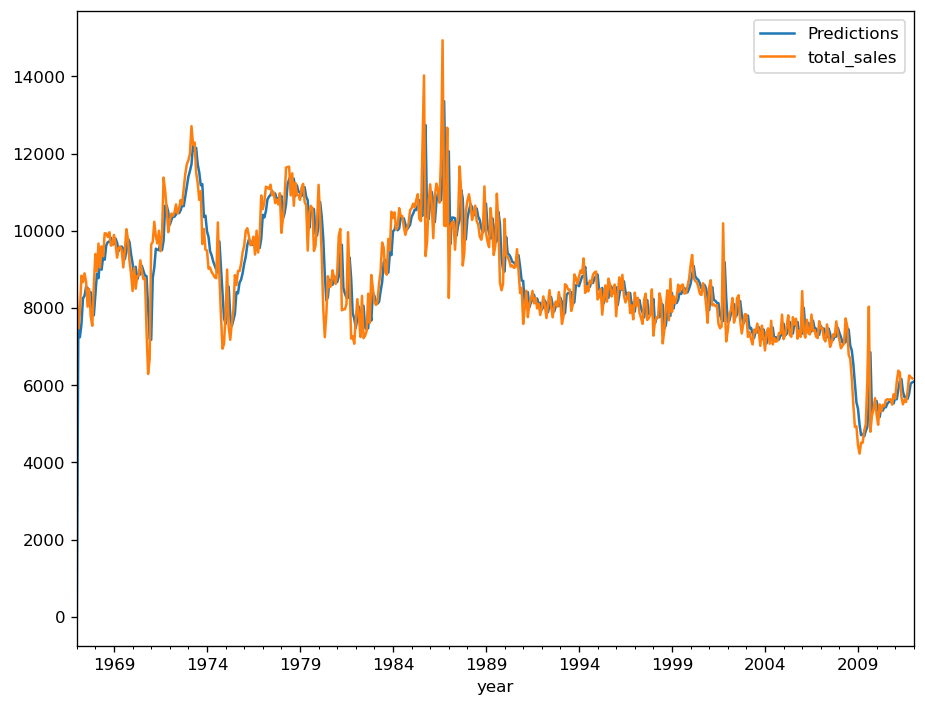

In [68]:
start = 0
end = len(train)
  
# Predictions for one-year against the train set
predictions = model_fit.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
train['total_sales'].plot(legend = True)

<AxesSubplot:xlabel='year'>

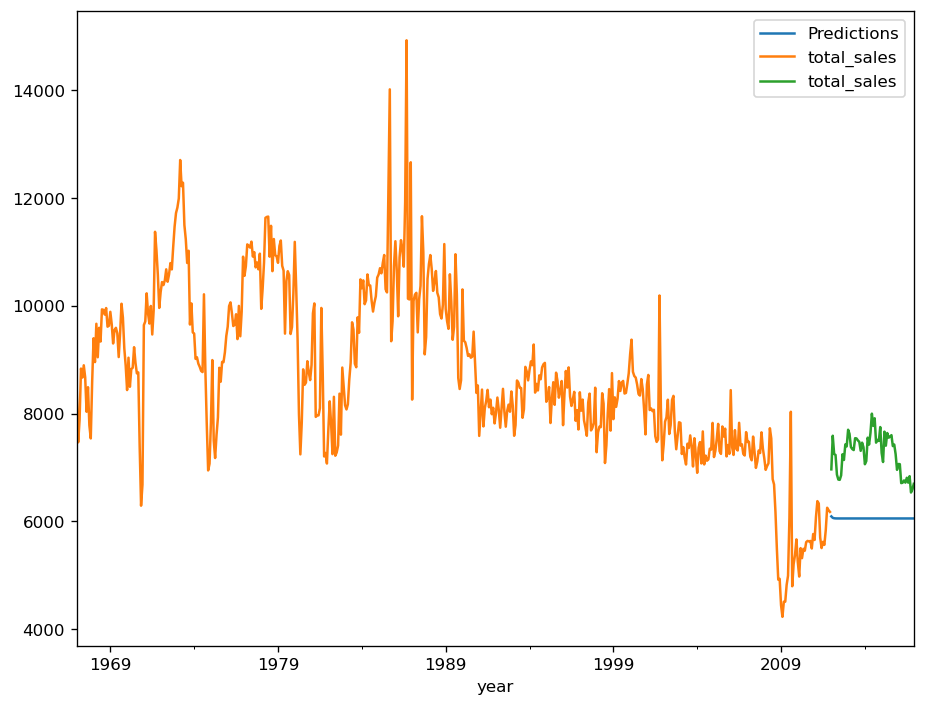

In [66]:
start = len(train)
end = len(train) + len(validate) - 1
  
# Predictions for one-year against the train set
predictions = model_fit.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
train['total_sales'].plot(legend = True)
validate['total_sales'].plot(legend = True)

In [69]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.40 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=8961.265, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=8578.886, Time=0.85 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=8738.361, Time=0.94 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=8960.349, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=8642.187, Time=0.09 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=8544.123, Time=2.81 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=4.76 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.06 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=8943.043, Time=0.92 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=8534.077, Time=3.11 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=8569.499, Time=1.03 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=8460.157, Time=6.12 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.13 sec
 ARIMA(2,0,0)(2,1,2)[12] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  540
Model:             SARIMAX(3, 0, 1)x(2, 1, 1, 12)   Log Likelihood               -4214.888
Date:                            Mon, 19 Sep 2022   AIC                           8447.777
Time:                                    15:29:32   BIC                           8486.199
Sample:                                01-01-1967   HQIC                          8462.818
                                     - 12-01-2011                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.5822      1.760     -0.331      0.741      -4.032       2.868
ar.L1          1.3448      0.083     16.163      0.000       1.182       1.508
ar.L2         -0.4336      0.098     -4.411      0.000      -0.626      -0.241
ar.L3          0.0805      0.074      1.094      0.274      -0.064       0.225
ma.L1         -0.7601      0.064    -11.809      0.000      -0.886      -0.634
ar.S.L12       0.0703      0.055      1.284      0.199      -0.037       0.178
ar.S.L24      -0.0995      0.063     -1.580      0.114      -0.223       0.024
ma.S.L12      -0.8790      0.046    -19.145      0.000      -0.969      -0.789
sigma2      6.943e+05   4.02e+04     17.265      0.000    6.15e+05    7.73e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.62   Jarque-Bera (JB):               536.41
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               0.51   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['total_sales'], 
                order = (3, 0, 1), 
                seasonal_order =(2, 1, 1, 12))
  
result = model.fit()
result.summary()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.87633D+00    |proj g|=  1.13957D-01

At iterate    5    f=  7.83631D+00    |proj g|=  4.58428D-02

At iterate   10    f=  7.82738D+00    |proj g|=  9.59438D-03

At iterate   15    f=  7.81864D+00    |proj g|=  2.14540D-02

At iterate   20    f=  7.81134D+00    |proj g|=  1.64297D-02

At iterate   25    f=  7.81060D+00    |proj g|=  3.17791D-03

At iterate   30    f=  7.80975D+00    |proj g|=  4.42506D-04

At iterate   35    f=  7.80964D+00    |proj g|=  4.19623D-03

At iterate   40    f=  7.79771D+00    |proj g|=  4.37161D-02

At iterate   45    f=  7.77200D+00    |proj g|=  6.55615D-02

At iterate   50    f=  7.76010D+00    |proj g|=  3.21973D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        total_sales   No. Observations:                  540
Model:             SARIMAX(3, 0, 1)x(2, 1, 1, 12)   Log Likelihood               -4190.455
Date:                            Mon, 19 Sep 2022   AIC                           8396.909
Time:                                    15:32:26   BIC                           8431.062
Sample:                                01-01-1967   HQIC                          8410.279
                                     - 12-01-2011                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3728      0.044     31.263      0.000       1.287       1.459
ar.L2         -0.4478      0.059     -7.639      0.000      -0.563      -0.333
ar.L3          0.0735      0.045      1.624      0.104      -0.015       0.162
ma.L1         -0.7853      0.032    -24.499      0.000      -0.848      -0.722
ar.S.L12       0.1137      0.033      3.465      0.001       0.049       0.178
ar.S.L24      -0.0791      0.039     -2.023      0.043      -0.156      -0.002
ma.S.L12      -0.9854      0.069    -14.270      0.000      -1.121      -0.850
sigma2      4.174e+05   2.25e+04     18.510      0.000    3.73e+05    4.62e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.58   Jarque-Bera (JB):               648.27
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               0.57   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.25e+14. Standard errors may be unstable.
"""

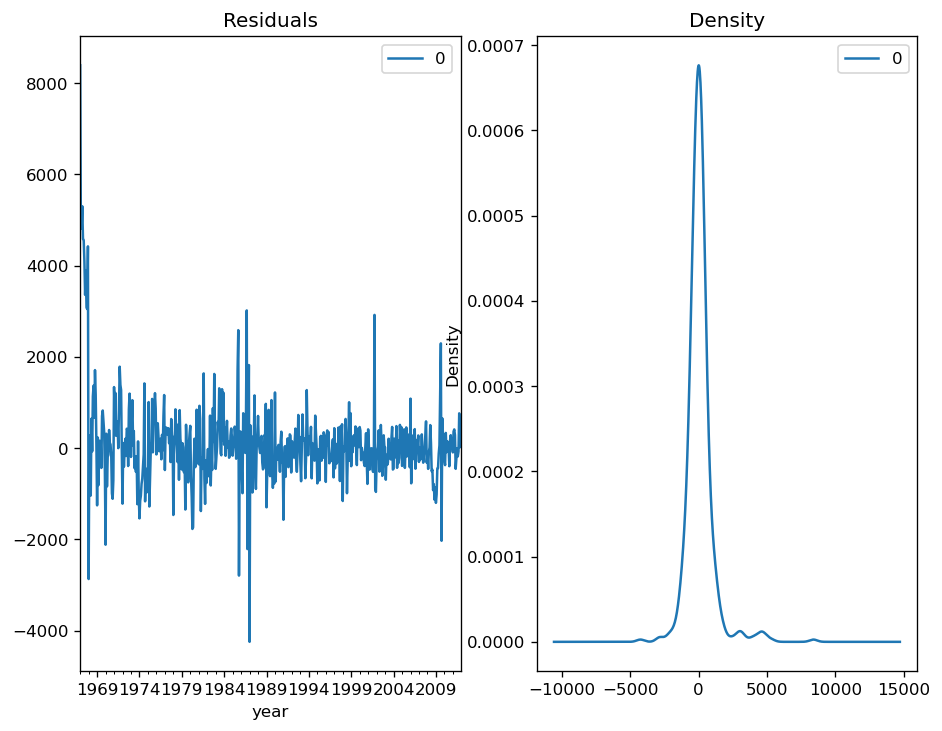

In [73]:
# Plot residual errors
residuals = pd.DataFrame(result.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

<AxesSubplot:xlabel='year'>

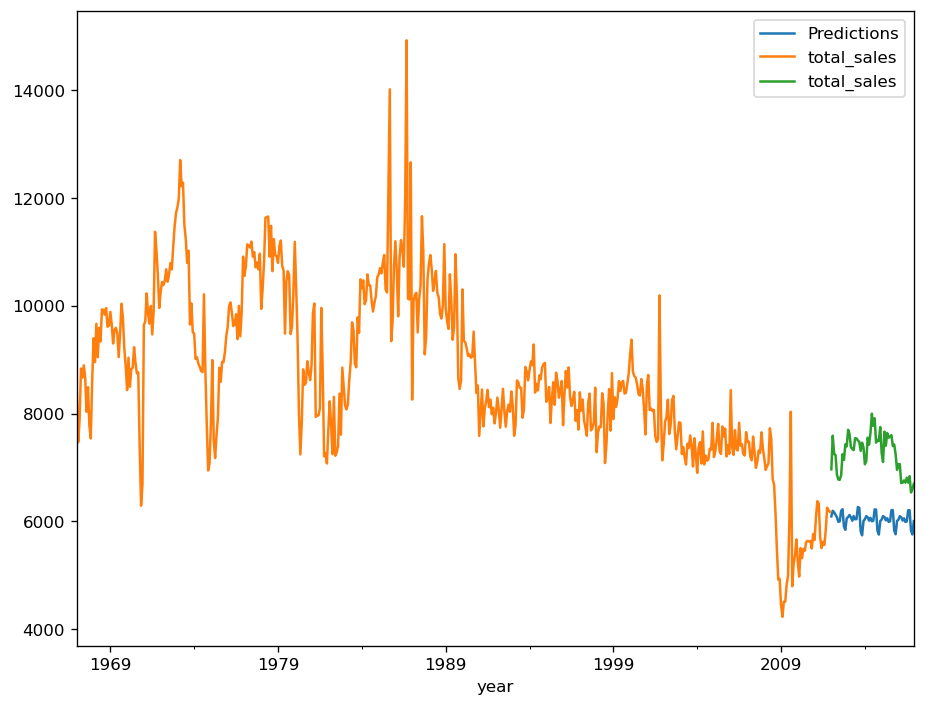

In [75]:
start = len(train)
end = len(train) + len(validate) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
train['total_sales'].plot(legend = True)
validate['total_sales'].plot(legend = True)

# Exponential Moving Average and bollinger bands

In [80]:
# 7 day EMA
ema_6m = train.ewm(span=6).mean().round()
ema_6m.head()


,total_sales
year,
1967-01-01,8393.0
1967-02-01,7853.0
1967-03-01,7868.0
1967-04-01,8242.0
1967-05-01,8392.0


In [82]:
# 12m EMA
ema_12m = train.ewm(span=12).mean().round()
ema_12m.head()


,total_sales
year,
1967-01-01,8393.0
1967-02-01,7891.0
1967-03-01,7890.0
1967-04-01,8188.0
1967-05-01,8319.0


In [83]:
# 18m EMA
ema_18m = train.ewm(span=18).mean().round()
ema_18m.head()


,total_sales
year,
1967-01-01,8393.0
1967-02-01,7904.0
1967-03-01,7898.0
1967-04-01,8173.0
1967-05-01,8295.0


In [84]:
#  24m EMA
ema_24m = train.ewm(span=24).mean().round()
ema_24m.head()


,total_sales
year,
1967-01-01,8393.0
1967-02-01,7911.0
1967-03-01,7902.0
1967-04-01,8166.0
1967-05-01,8284.0


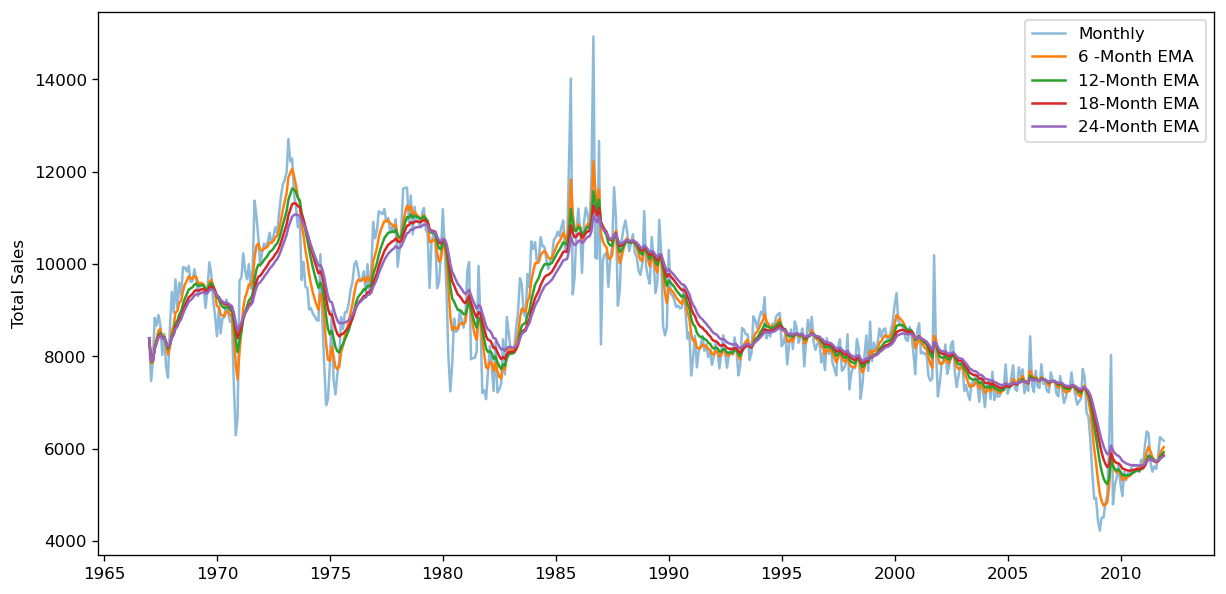

In [90]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(train.index, train.total_sales, label='Monthly', alpha=.5)

ax.plot(train.index, ema_6m.total_sales, label = '6 -Month EMA')
ax.plot(train.index, ema_12m.total_sales, label = '12-Month EMA')
ax.plot(train.index, ema_18m.total_sales, label = '18-Month EMA')
ax.plot(train.index, ema_24m.total_sales, label = '24-Month EMA')

ax.legend(loc='best')
ax.set_ylabel('Total Sales')

plt.show()


In [91]:
# set the window span
span = 18

# compute midband
midband = train.ewm(span=span).mean()

midband.head()


,total_sales
year,
1967-01-01,8393.000000
1967-02-01,7904.277778
1967-03-01,7897.867420
1967-04-01,8172.852521
1967-05-01,8295.283623


In [92]:
# compute exponential stdev
stdev = train.ewm(span=span).std()

stdev.head()


,total_sales
year,
1967-01-01,NaN
1967-02-01,654.780879
1967-03-01,450.071704
1967-04-01,609.757771
1967-05-01,566.010738


In [93]:
# compute upper and lower bands
ub = midband + stdev*3
lb = midband - stdev*3
ub


,total_sales
year,
1967-01-01,NaN
1967-02-01,9868.620416
1967-03-01,9248.082532
1967-04-01,10002.125833
1967-05-01,9993.315835
...,...
2011-08-01,7150.969094
2011-09-01,7091.234430
2011-10-01,7165.856823


In [94]:
lb

,total_sales
year,
1967-01-01,NaN
1967-02-01,5939.935140
1967-03-01,6547.652309
1967-04-01,6343.579210
1967-05-01,6597.251410
...,...
2011-08-01,4273.133779
2011-09-01,4358.962878
2011-10-01,4395.267084


In [95]:
# concatenate ub and lb together into one df, bb
bb = pd.concat([ub, lb], axis=1)

bb.columns = ['ub', 'lb']
bb.head()


,ub,lb
year,,
1967-01-01,NaN,NaN
1967-02-01,9868.620416,5939.935140
1967-03-01,9248.082532,6547.652309
1967-04-01,10002.125833,6343.579210
1967-05-01,9993.315835,6597.251410


In [97]:
my_df = pd.concat([train.total_sales, midband, bb], axis=1)
my_df.columns = ['sales', 'midband', 'ub', 'lb']
my_df.head()


,sales,midband,ub,lb
year,,,,
1967-01-01,8393.0,8393.000000,NaN,NaN
1967-02-01,7467.0,7904.277778,9868.620416,5939.935140
1967-03-01,7887.0,7897.867420,9248.082532,6547.652309
1967-04-01,8836.0,8172.852521,10002.125833,6343.579210
1967-05-01,8669.0,8295.283623,9993.315835,6597.251410


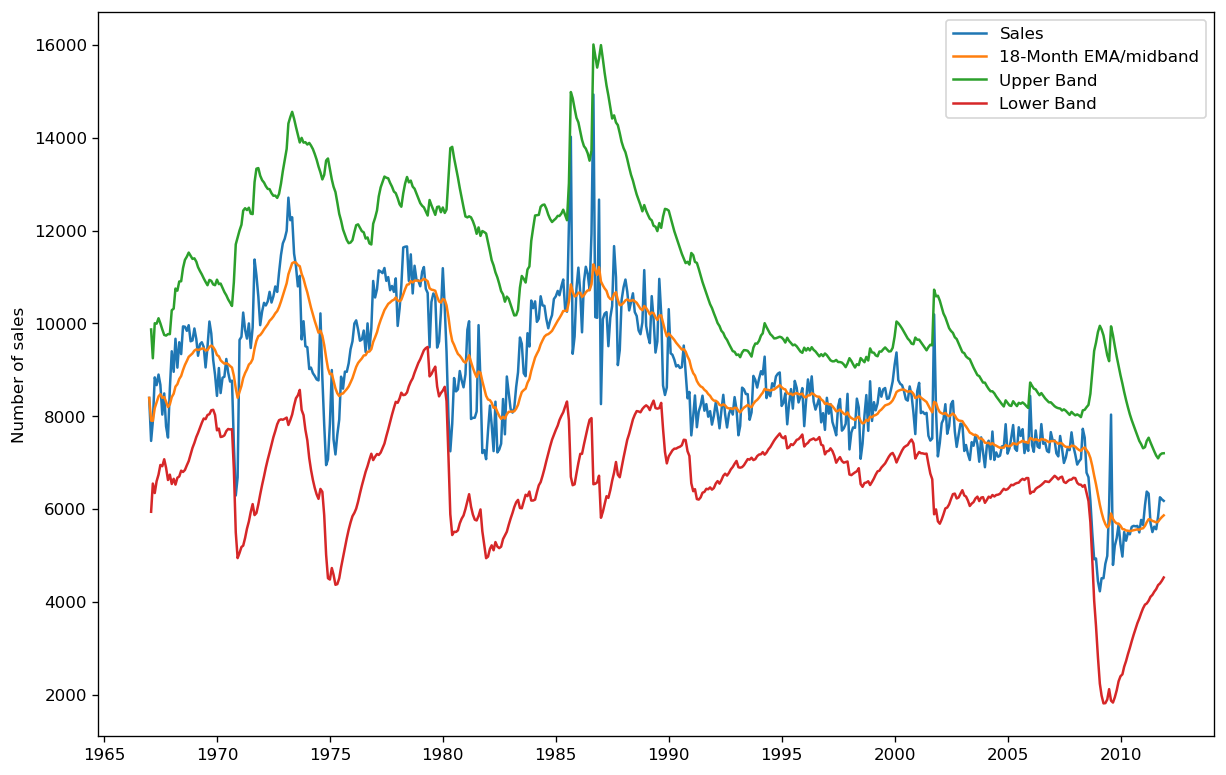

In [99]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(my_df.index, my_df.sales, label='Sales')

ax.plot(my_df.index, my_df.midband, label = '18-Month EMA/midband')
ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
ax.plot(my_df.index, my_df.lb, label = 'Lower Band')

ax.legend(loc='best')
ax.set_ylabel('Number of sales')

plt.show()


In [101]:
# get the last measure of gb
last_measure = my_df.iloc[-1].sales
last_measure


6175.0

In [102]:
# get the lower band value on the last date
last_lb = my_df.iloc[-1].lb
last_lb


4523.592719576002

In [103]:
# get the upper band value on the last date
last_ub = my_df.iloc[-1].ub
last_ub


7200.8970560125335

In [104]:
# compute %b
last_pct_b = (last_measure - last_lb)/(last_ub - last_lb)

print('%b for last datapoint: ', round(last_pct_b, 2))


%b for last datapoint:  0.62


In [105]:
my_df['pct_b'] = (my_df['sales'] - my_df['lb'])/(my_df['ub'] - my_df['lb'])

my_df.head()


,sales,midband,ub,lb,pct_b
year,,,,,
1967-01-01,8393.0,8393.000000,NaN,NaN,NaN
1967-02-01,7467.0,7904.277778,9868.620416,5939.935140,0.388696
1967-03-01,7887.0,7897.867420,9248.082532,6547.652309,0.495976
1967-04-01,8836.0,8172.852521,10002.125833,6343.579210,0.681260
1967-05-01,8669.0,8295.283623,9993.315835,6597.251410,0.610044


In [106]:
my_df[my_df['pct_b']>1]


,sales,midband,ub,lb,pct_b
year,,,,,


# forecasting on test 

In [107]:
# time series - statsmodels 


# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [108]:
# Set the frequency of the date time index as Monthly start as indicated by the data
train.index.freq = 'MS'
# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2*m)

<AxesSubplot:title={'center':'Holt Winters Single Exponential Smoothing'}, xlabel='year'>

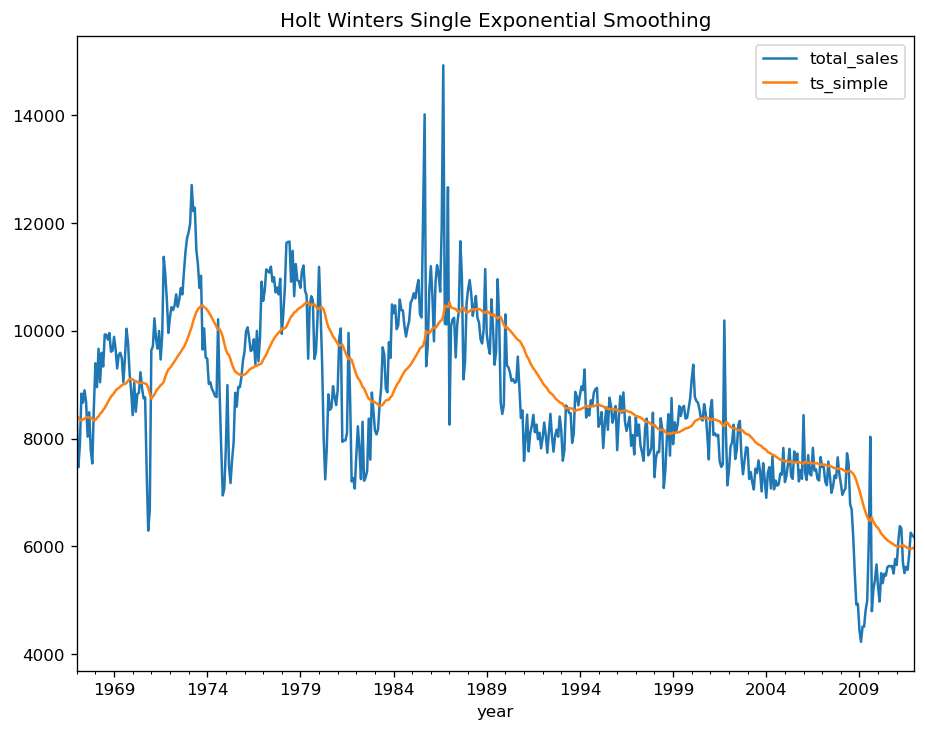

In [110]:
train['ts_simple'] = SimpleExpSmoothing(train['total_sales']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
train[['total_sales', 'ts_simple']].plot(title='Holt Winters Single Exponential Smoothing')

WARNING - (py.warnings._showwarnmsg) - /opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(

WARNING - (py.warnings._showwarnmsg) - /opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



<AxesSubplot:title={'center':'Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend'}, xlabel='year'>

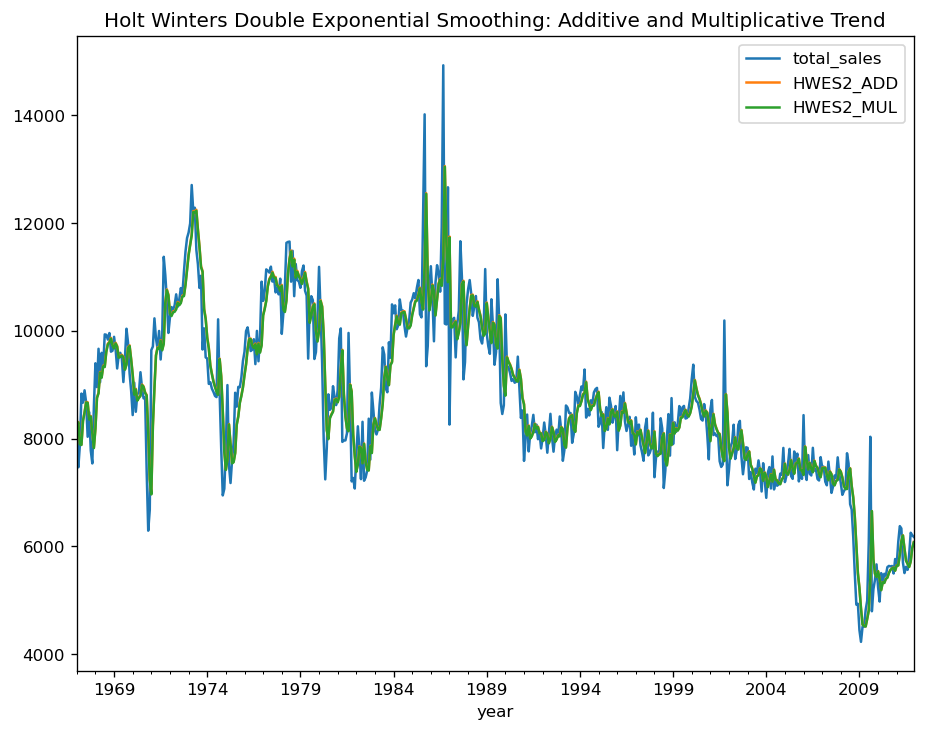

In [111]:
train['HWES2_ADD'] = ExponentialSmoothing(train['total_sales'],trend='add').fit().fittedvalues
train['HWES2_MUL'] = ExponentialSmoothing(train['total_sales'],trend='mul').fit().fittedvalues
train[['total_sales','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend')

WARNING - (py.warnings._showwarnmsg) - /opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



Text(0.5, 1.0, 'Train, validate and Predicted validate using Holt Winters')

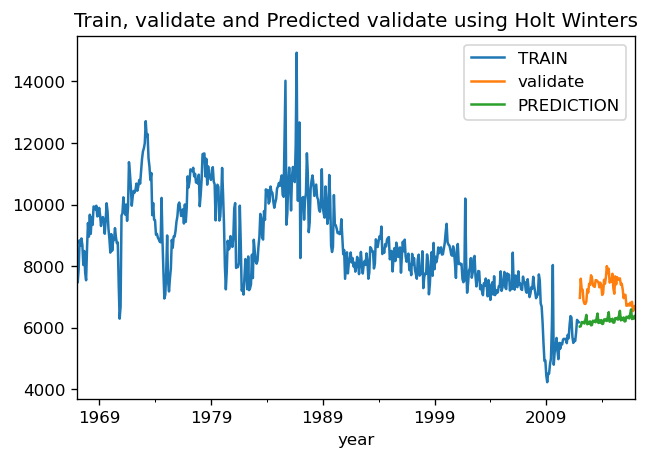

In [120]:
fitted_model = ExponentialSmoothing(train['total_sales'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
validate_predictions = fitted_model.forecast(60)
train['total_sales'].plot(legend=True,label='TRAIN')
validate['total_sales'].plot(legend=True,label='validate',figsize=(6,4))
validate_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, validate and Predicted validate using Holt Winters')

<AxesSubplot:xlabel='year'>

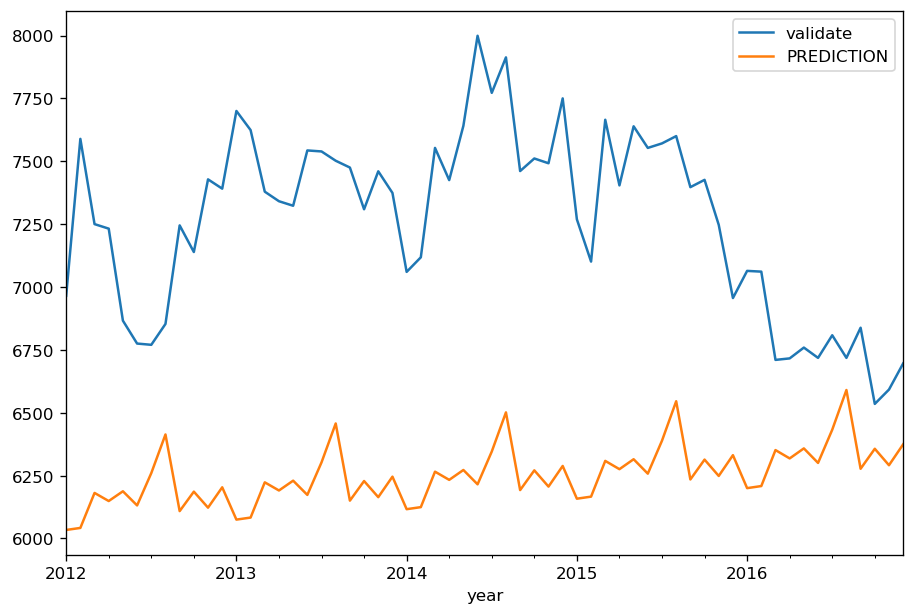

In [127]:
validate['total_sales'].plot(legend=True,label='validate',figsize=(9,6))
validate_predictions.plot(legend=True,label='PREDICTION')

In [118]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
y_true

In [126]:
print(f'Mean Absolute Error = {mean_absolute_error(validate,validate_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(validate,validate_predictions)}')

ValueError: y_true and y_pred have different number of output (3!=1)